In [8]:

from __future__ import absolute_import, division, print_function
import numpy as np
from MDAnalysis.analysis.distances import distance_array
from MDAnalysis.core.groups import AtomGroup
import MDAnalysis as mda


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
u = mda.Universe('../6.6_2.gro','../old_trajs/rep4_skip10.xtc')

In [11]:
class Coord:
    
    def __init__(self):
        pass

    def run(self, ag1, ag2, nn=6, mm=12, d0=0, r0=3.5, density=False, b=0, e=None, skip=1):
        

        assert isinstance(ag1, AtomGroup)
        assert isinstance(ag2, AtomGroup)
        u = ag1.universe

        times = []; coords = []
        for i, ts in enumerate(u.trajectory[b:e:skip]):
            times.append(i)
            d = distance_array(ag1.positions, ag2.positions, box=u.dimensions)
            d[ d < d0 ] = 1
            D = (d - d0)/r0
            sij = (1 - np.power(D, nn))/(1 - np.power(D, mm))
            coords.append(np.sum(sij))
        
        if density:
            coords = np.array(coords)
            coords /= (ag1.n_atoms * ag2.n_atoms)
        
        return np.transpose([times, coords])


    def contact(self, ag1, ag2, rcut, density=False, b=0, e=None, skip=1):

        assert isinstance(ag1, AtomGroup)
        assert isinstance(ag2, AtomGroup)
        u = ag1.universe

        times = []; coords = []
        for i, ts in enumerate(u.trajectory[b:e:skip]):
            times.append(i)
            d = distance_array(ag1.positions, ag2.positions, box=u.dimensions)
            d[ d <= rcut ] = 1
            d[ d >  rcut ] = 0
            coords.append(np.sum(d))
        
        if density:
            coords = np.array(coords)
            coords /= (ag1.n_atoms * ag2.n_atoms)
        
        return np.transpose([times, coords])
        

Plan here:
will make coordination groups for multiple types of packing defects.

- 7 groups for PL
- 5 goups for TG

will test:
- hydrophobes
- polars
- charged


In [12]:
PL_A = u.select_atoms('resname POPC DOPE and (name C15C C14  C13 N C12 \
                     C11 C11A C11B)')
PL_B = u.select_atoms('resname POPC DOPE and (name P O12 O11 O13 O14)')
PL_C = u.select_atoms('resname POPC DOPE and (name C1 C2  C21 O21 O22 C3  C31 O31 O32)')
PL_D = u.select_atoms('resname POPC DOPE  and (name C22 C23 C24 C25 C26  \
                        C32 C33 C34 C35 C36 C36 )')
PL_E = u.select_atoms('resname POPC DOPE and (name C27 C28 C29 C210  C37 C38 C39 C310 H7X H7Y )')
PL_F = u.select_atoms('resname POPC DOPE and (name C311 C312 C313 C314 C315 \
                     C211 C212 C213 C214 C215 )')
PL_G = u.select_atoms('resname POPC DOPE and (name C216 C217 C218  \
                        C316 C317 C318 )')

In [202]:
PL_A = u.select_atoms('resname POPC DOPE and (name C15 H15A H15B H15C C14 H14A H14B H14C C13 H13A H13B H13B N C12 \
                     H12A H12B C11 C11A C11B)')
PL_B = u.select_atoms('resname POPC DOPE and (name P O12 O11 O13 O14)')
PL_C = u.select_atoms('resname POPC DOPE and (name C1 C2 HA HB C21 O21 O22 C3 HX HY C31 O31 O32)')
PL_D = u.select_atoms('resname POPC DOPE  and (name C22 C23 C24 C25 C26 H3R H3S H2R H2S H4R H4S H5R H5S H6R H6S \
                        C32 C33 C34 C35 C36 C36 H2X H2Y H3X H3Y H4X H4Y H5X H5Y H6X H6Y)')
PL_E = u.select_atoms('resname POPC DOPE and (name C27 C28 C29 C210 H7R H7S H8R H8S H9R H10R C37 C38 C39 C310 H7X H7Y H8X H8Y H9X H10X)')
PL_F = u.select_atoms('resname POPC DOPE and (name C311 C312 C313 C314 C315 H11X H11Y H12X H12Y H13X H13Y H14X H14Y \
                     C211 C212 C213 C214 C215 H11R H11S H12R H12S H13R H13S H14R H14S H15R H15S)')
PL_G = u.select_atoms('resname POPC DOPE and (name C216 C217 C218 H16R H16S H17R H17S H18R H18S H18T \
                        C316 C317 C318 H16X H16Y H17X H17Y H18X H18Y H18Z)')

In [ ]:
C15 H15A H15B H15C C14 H14A H14B H14C C13 H13A H13B H13B N C12 H12A H12B C11 C11A C11B P O12 O11 O13 O14 C1 C2 HA HB C21 O21 O22 C3 HX HY C31 O31 O32

In [203]:
TG_A = u.select_atoms('resname TRIO and (name O21 O22 C21 C3 O31 O32 C2 HS C1 HA HB  O11 O12 C11 C22 C32 C12 )')
TG_B = u.select_atoms('resname TRIO and (name   C23 C24 C25 C26 H3R H3S H2R H2S H4R H4S H5R H5S H6R H6S  C33 C34 C35 C36 C36 H2X H2Y H3X H3Y H4X H4Y H5X H5Y H6X H6Y \
                         C13 C14 C15 C16 H3A H3B H2A H2B H4A H4B H5A H5B H6A H6B )')
TG_C = u.select_atoms('resname TRIO and (name C27 C28 C29 C210 H7R H7S H8R H8S H9R H10R C37 C38 C39 C310 H7X H7Y H8X H8Y H9X H10X \
                        C17 C18 C19 C110 H7A H7B H8A H8B H9A H10A)')
TG_D = u.select_atoms('resname TRIO and (name C311 C312 C313 C314 C315 H11X H11Y H12X H12Y H13X H13Y H14X H14Y \
                     C211 C212 C213 C214 C215 H11R H11S H12R H12S H13R H13S H14R H14S H15R H15S \
                        C111 C112 C113 C114 C115 H11A H11B H12A H12B H13A H13B H14A H14B H15A H15B)')
TG_E = u.select_atoms('resname TRIO and (name C216 C217 C218 H16R H16S H17R H17S H18R H18S H18T \
                        C316 C317 C318 H16X H16Y H17X H17Y H18X H18Y H18Z C116 C117 C118 H16A H16B H17A H17B H18A H18B H18C)')


In [204]:
PL_G

<AtomGroup with 3768 atoms>

In [31]:
a = u.select_atoms('resid 22 and name NH1 NH2')

In [32]:
a

<AtomGroup with 2 atoms>

In [25]:
cog = a.center_of_geometry()
com = a.center_of_mass()

In [27]:
com

array([ 31.59250212,   2.92250019, 176.92750168])

Now we will start to create the scripting to account for the different groups and coordination number
- start with PLs, then TGs 
- return the coordination numbers
- 

In [28]:
a

<AtomGroup with 4 atoms>

In [217]:
time = 100
time_e = 200

In [33]:
pl_1 =Coord().run(a,PL_A)
pl_2 =Coord().run(a,PL_B)
pl_3 =Coord().run(a,PL_C)
pl_4 =Coord().run(a,PL_D)
pl_5 =Coord().run(a,PL_E)
pl_6 =Coord().run(a,PL_F)
pl_7 =Coord().run(a,PL_G)

In [34]:
av_a  = np.average(pl_1[:,1])
av_b  = np.average(pl_2[:,1])
av_c  = np.average(pl_3[:,1])
av_d  = np.average(pl_4[:,1])
av_e  = np.average(pl_5[:,1])
av_f  = np.average(pl_6[:,1])
av_g  = np.average(pl_7[:,1])

In [35]:
std_a  = np.std(pl_1[:,1])
std_b  = np.std(pl_2[:,1])
std_c  = np.std(pl_3[:,1])
std_d  = np.std(pl_4[:,1])
std_e  = np.std(pl_5[:,1])
std_f  = np.std(pl_6[:,1])
std_g  = np.std(pl_7[:,1])

In [36]:
std_g

0.16825215280835157

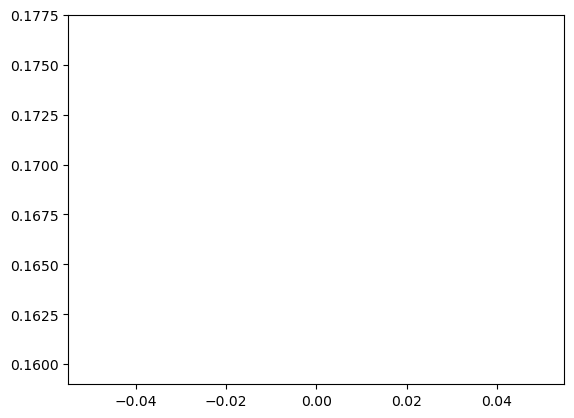

In [37]:
plt.plot(std_g)

In [38]:
# std_a  = np.std(pl_1[:,1])/ np.sqrt(len(pl_1[:,1]))
# std_b  = np.std(pl_2[:,1])/ np.sqrt(len(pl_1[:,1]))
# std_c  = np.std(pl_3[:,1])/ np.sqrt(len(pl_1[:,1]))
# std_d  = np.std(pl_4[:,1])/ np.sqrt(len(pl_1[:,1]))
# std_e  = np.std(pl_5[:,1])/ np.sqrt(len(pl_1[:,1]))
# std_f  = np.std(pl_6[:,1])/ np.sqrt(len(pl_1[:,1]))
# std_g  = np.std(pl_7[:,1])/ np.sqrt(len(pl_1[:,1]))

In [39]:
np.sqrt(len(pl_1[:,1]))

31.63858403911275

In [40]:
ls = [av_a, av_b,av_c,av_d,av_e,av_f,av_g]
ls_yerr  = [std_a,std_b,std_c,std_d,std_e,std_f,std_g]

In [41]:
ls_yerr

[0.7057055278285101,
 2.189834748309738,
 1.831953149342791,
 0.8173382172719275,
 0.4706750112250846,
 0.16752128348967052,
 0.16825215280835157]

In [42]:
ls

[0.9348612385632614,
 3.6648345502973467,
 2.7120437013080934,
 1.031083001972029,
 0.243210741634427,
 0.07366848145194102,
 0.04161293292579521]

<ErrorbarContainer object of 3 artists>

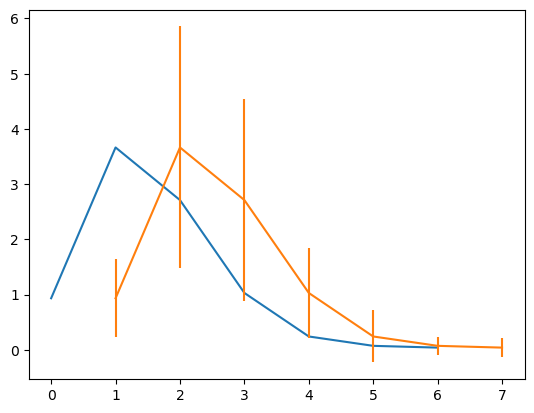

In [43]:
plt.plot(ls)
plt.errorbar(x=[1,2,3,4,5,6,7],y=ls, 
             yerr = ls_yerr,
             fmt ='')

In [44]:
df_pl_av = pd.DataFrame(ls)
df_pl_std = pd.DataFrame(ls_yerr)

In [45]:
df_pl_av.to_csv('arg229_pl.csv')
df_pl_std.to_csv('arg229_pl_err.csv')

In [10]:
tg_1 =Coord().run(a,TG_A)
tg_2 =Coord().run(a,TG_B)
tg_3 =Coord().run(a,TG_C)
tg_4 =Coord().run(a,TG_D)
tg_5 =Coord().run(a,TG_E)



In [11]:
pls = u.select_atoms('resname POPC DOPE')
number = pls.atoms.n_residues
tgs = u.select_atoms('resname TRIO')
number_tg = tgs.atoms.n_residues

In [12]:
number

250

In [13]:
number_tg

429

In [14]:
a = pl_1/number
b = pl_2/number
c = pl_3/number
d = pl_4/number
e = pl_5/number
f = pl_6/number
g = pl_7/number

In [15]:
av_a  = np.average(a[:,1])
av_b  = np.average(b[:,1])
av_c  = np.average(c[:,1])
av_d  = np.average(d[:,1])
av_e  = np.average(e[:,1])
av_f  = np.average(f[:,1])
av_g  = np.average(g[:,1])

In [43]:
std_a  = np.std(a[:,1])
std_b  = np.std(b[:,1])
std_c  = np.std(c[:,1])
std_d  = np.std(d[:,1])
std_e  = np.std(e[:,1])
std_f  = np.std(f[:,1])
std_g  = np.std(g[:,1])

In [16]:
av_a_no_norm  = np.average(pl_1[:,1])
av_b_no_norm  = np.average(pl_2[:,1])
av_c_no_norm  = np.average(pl_3[:,1])
av_d_no_norm  = np.average(pl_4[:,1])
av_e_no_norm  = np.average(pl_5[:,1])
av_f_no_norm  = np.average(pl_6[:,1])
av_g_no_norm  = np.average(pl_7[:,1])

In [17]:
av_a_no_norm_tg  = np.average(tg_1[:,1])
av_b_no_norm_tg  = np.average(tg_2[:,1])
av_c_no_norm_tg  = np.average(tg_3[:,1])
av_d_no_norm_tg  = np.average(tg_4[:,1])
av_e_no_norm_tg  = np.average(tg_5[:,1])


In [18]:
a_tg = tg_1/number_tg
b_tg = tg_2/number_tg
c_tg = tg_3/number_tg
d_tg = tg_4/number_tg
e_tg = tg_5/number_tg


In [19]:
av_a  = np.average(a[:,1])
av_b  = np.average(b[:,1])
av_c  = np.average(c[:,1])
av_d  = np.average(d[:,1])
av_e  = np.average(e[:,1])
av_f  = np.average(f[:,1])
av_g  = np.average(g[:,1])

In [20]:
av_tg_a  = np.average(a_tg[:,1])
av_tg_b  = np.average(b_tg[:,1])
av_tg_c  = np.average(c_tg[:,1])
av_tg_d  = np.average(d_tg[:,1])
av_tg_e  = np.average(e_tg[:,1])


In [21]:
ls_non_norm = (av_a_no_norm,av_b_no_norm,av_c_no_norm,av_d_no_norm,av_e_no_norm,av_f_no_norm,av_g_no_norm)
ls_non_norm_tg = (av_a_no_norm_tg,av_b_no_norm_tg,av_c_no_norm_tg,av_e_no_norm_tg,av_e_no_norm_tg)

In [22]:
ls_non_norm

(0.3254891356088174,
 0.5236330291351229,
 0.39034510802933425,
 0.36025460912487733,
 0.05246479688296284,
 0.035689418139301626,
 0.013513402221643617)

In [23]:
ls_non_norm_tg

(0.022308287382163932,
 0.01733558879797877,
 0.0014165512288265133,
 0.003973314042704343,
 0.003973314042704343)

In [24]:
ls=(av_a,av_b,av_c,av_d,av_e,av_f,av_g)

In [25]:
ls_tg=(av_tg_a,av_tg_b,av_tg_c,av_tg_d,av_tg_e)

In [26]:
ls_tg

(5.200066988849401e-05,
 4.040929789738641e-05,
 3.3019842163788184e-06,
 4.160091510258036e-06,
 9.261804295348118e-06)

In [27]:
ls

(0.0013019565424352696,
 0.0020945321165404913,
 0.0015613804321173372,
 0.0014410184364995094,
 0.00020985918753185133,
 0.0001427576725572065,
 5.405360888657446e-05)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df_pl_av = pd.DataFrame(ls)

In [31]:
df_tg_av = pd.DataFrame(ls_tg)

In [32]:
df_pl_av.to_csv('arg_pl.csv')

In [33]:
df_tg_av.to_csv('arg_tg.csv')

In [38]:
df_tg_av

,0
0,0.000052
1,0.000040
2,0.000003
3,0.000004
4,0.000009


In [51]:
av = df2.mean()
std = df2.std()

In [52]:
av[1]

38.9987464793078

In [53]:
std[1]

8.059117821598026

In [54]:
std[1]/259

0.031116285025475

In [55]:
norm = av[1]/259

In [56]:
norm

0.15057431073091815

In [59]:
df2['iner coord']/259

0       0.014458
1       0.016648
2       0.014170
3       0.014001
4       0.011360
          ...   
1792    0.043977
1793    0.050299
1794    0.045252
1795    0.045377
1796    0.041509
Name: iner coord, Length: 1797, dtype: float64

In [34]:
popc = u.select_atoms('resname POPC')
dope = u.select_atoms('resname DOPE')
sapi = u.select_atoms('resname SAPI')

In [35]:
a1=len(popc)/134
b1=len(dope)/129
c1=len(sapi)/143

In [36]:
a1+b1+c1

259.0

In [54]:
len(trio)/167

425.0

In [2]:
for num in range(0,10):
    if num <= 5:
        continue
    print(f'Iteration: {num}')

Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
